In [14]:
import numpy as np
from random import randrange
from sklearn.datasets import load_boston 
import matplotlib.pyplot as plt

In [15]:
boston,values = load_boston(return_X_y=True)
#Augmented Matrix
augmented = np.ones((506,14))
for i in range(0,506):
    for j in range(0,13):
        augmented[i,j] = boston[i,j]

trainData = augmented
trainLabels = values

In [29]:
#Calculate w for training set- LS Regression
def LSRegression(trainData,trainLabels):
    leastSquares = ((np.linalg.inv(trainData.T@trainData)@trainData.T)@trainLabels)
    y_hat = trainData@leastSquares
    return leastSquares
print(LSRegression(trainData,values).data.shape)

(14,)


In [30]:
#Compute Least Squares Error
def LSError(actual,predicted):
    error = np.linalg.norm(actual-predicted,2)
    return error
pred = trainData@LSRegression(trainData,trainLabels)
print(LSError(trainLabels,pred))

105.26289129674272


58.69047395217554

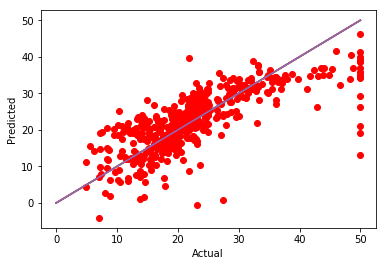

In [37]:
def LeastSquares_CV(trainData,trainLabels,folds):
    #Split training data and training labels
    splitData = np.array_split(trainData,folds)
    splitLabels = np.array_split(trainLabels,folds)
    predError = 0
    #Cross Validation
    for i in range(folds):
        dataset = list()
        dataLabels = list()
        #Test Set
        testData = splitData[i]
        testLabels = splitLabels[i]
        for j in range(folds):
            if(i==j):
                continue
            dataset.extend(splitData[j])
            dataLabels.extend(splitLabels[j])
        dataset = np.asarray(dataset)
        dataLabels = np.asarray(dataLabels)
        
        #Compute w_hat and y_hat for test set
        w_hat = LSRegression(dataset,dataLabels)
        predicted = testData@w_hat
        error = LSError(testLabels, predicted)
        
        #Avg Error
        predError = predError + error
        plt.plot(testLabels,predicted,'ro')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
    
        #Line with slope=1
        x = np.linspace(0,50,100)
        y = x
        plt.plot(x,y)
        avgError = predError/folds
    return avgError

LeastSquares_CV(trainData,trainLabels,5)

In [60]:
#Calculate w for training set- Ridge Regression
def RidgeRegression(trainData,trainLabels,regParam):
    ridgeA = np.linalg.inv(trainData.T@trainData)
    identity = np.identity(len(ridgeA))
    ridge = np.linalg.inv(trainData.T@trainData + (regParam*identity))@trainData.T@trainLabels
    return ridge

In [57]:
#Compute Ridge Regression Error
def RidgeError(actual,predicted):
    error = np.linalg.norm(actual-predicted,2)
    return error

In [58]:
def RR_CV(trainData,trainLabels,folds,regParam):
    #Split training data and training labels
    splitData = np.array_split(trainData,folds)
    splitLabels = np.array_split(trainLabels,folds)
    predError = 0
    #Cross Validation
    for i in range(folds):
        dataset = list()
        dataLabels = list()
        #Test Set
        testData = splitData[i]
        testLabels = splitLabels[i]
        for j in range(folds):
            if(i==j):
                continue
            dataset.extend(splitData[j])
            dataLabels.extend(splitLabels[j])
        dataset = np.asarray(dataset)
        dataLabels = np.asarray(dataLabels)
        
        #Compute w_hat and y_hat for test set
        w_hat = RidgeRegression(dataset,dataLabels,regParam)
        predicted = testData@w_hat
        error = RidgeError(testLabels, predicted)
        
        #Avg Error
        predError = predError + error
        avgError = predError/folds
    return avgError

RR_CV(trainData,trainLabels,5,1)

54.972314406156976

In [59]:
def computeParam(trainLabels_split,trainData_split,regParamStart,regParamEnd,folds):
    predError = list()
    regParamRange = regParamEnd - regParamStart
    for i in range(int(regParamStart),regParamEnd):
        error = RR_CV(trainLabels_split,trainData_split,folds,i)
        predError.append(error)
    avgError = sum(predError)/int(regParamRange)
    return avgError
computeParam(trainData,trainLabels,.5,5,5)    

69.17482125163659